In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%ls

 Volume in drive C is Windows 
 Volume Serial Number is FA6D-F604

 Directory of C:\Users\gowthami.s\DataScience\MachineLearning

06-08-2022  15:45    <DIR>          .
06-08-2022  15:45    <DIR>          ..
28-06-2022  22:42    <DIR>          .ipynb_checkpoints
06-08-2022  15:42         1,143,345 sample_submission.csv
06-08-2022  15:44         6,927,930 test.csv
06-08-2022  15:44        21,432,357 train.csv
               3 File(s)     29,503,632 bytes
               3 Dir(s)  51,803,136,000 bytes free


In [40]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [41]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [42]:
print(train[train['Response']==1].shape)
print(train[train['Response']==0].shape)
train_1=train[train['Response']==1]
train_0=train[train['Response']==0]

(46710, 12)
(334399, 12)


In [43]:
for i in range(6):
    train=pd.concat([train,train_1])
    print(i)
    print(train[train['Response']==1].shape)
    print(train[train['Response']==0].shape)

# train=pd.concat([train_1,train_0.sample(frac=1).reset_index(drop=True)[:46710]])

train = train.sample(frac=1).reset_index(drop=True)

0
(93420, 12)
(334399, 12)
1
(140130, 12)
(334399, 12)
2
(186840, 12)
(334399, 12)
3
(233550, 12)
(334399, 12)
4
(280260, 12)
(334399, 12)
5
(326970, 12)
(334399, 12)


In [44]:
trainlen=train.shape[0]
testlen=test.shape[0]
print(trainlen)
print(testlen)

661369
127037


In [45]:
y_train=train['Response']
data=pd.concat([train.drop('Response',1),test],0)
data=data.reset_index()

In [46]:
print(data.shape[0])
print(trainlen+testlen)

788406
788406


In [47]:
data.head()

,index,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,41450,Male,53,1,28.0,0,> 2 Years,Yes,2630.0,26.0,85
1,1,96592,Male,26,1,22.0,1,< 1 Year,No,22208.0,152.0,255
2,2,2051,Male,49,1,36.0,0,> 2 Years,Yes,35401.0,124.0,254
3,3,361794,Male,23,1,13.0,0,< 1 Year,Yes,29679.0,152.0,139
4,4,73795,Female,40,1,28.0,0,1-2 Year,Yes,34910.0,124.0,71


In [48]:
data=data.drop('id',1)
data=data.drop('index',1)

In [49]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,53,1,28.0,0,> 2 Years,Yes,2630.0,26.0,85
1,Male,26,1,22.0,1,< 1 Year,No,22208.0,152.0,255
2,Male,49,1,36.0,0,> 2 Years,Yes,35401.0,124.0,254
3,Male,23,1,13.0,0,< 1 Year,Yes,29679.0,152.0,139
4,Female,40,1,28.0,0,1-2 Year,Yes,34910.0,124.0,71


In [50]:
data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [51]:
data['Gender']=data['Gender'].map({"Male":0,"Female":1})
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,53,1,28.0,0,> 2 Years,Yes,2630.0,26.0,85
1,0,26,1,22.0,1,< 1 Year,No,22208.0,152.0,255
2,0,49,1,36.0,0,> 2 Years,Yes,35401.0,124.0,254
3,0,23,1,13.0,0,< 1 Year,Yes,29679.0,152.0,139
4,1,40,1,28.0,0,1-2 Year,Yes,34910.0,124.0,71


<AxesSubplot:xlabel='Age', ylabel='Density'>

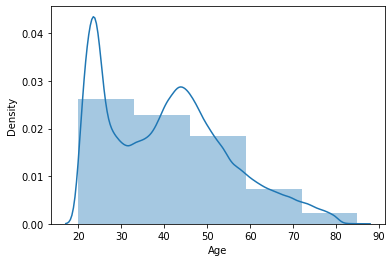

In [52]:
sns.distplot(train['Age'],5)

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
train.Region_Code.unique()

array([28., 22., 36., 13., 27.,  8., 23., 41., 10.,  3., 15., 32., 16.,
       25., 50.,  7., 37.,  2., 17., 33., 51., 48., 43., 35., 18.,  6.,
       29., 11.,  9., 12., 45., 19., 38., 14., 46., 31., 26., 34., 24.,
        4., 21., 30., 44., 47., 20., 39.,  1., 40.,  5., 49.,  0., 42.,
       52.])

In [55]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,53,1,28.0,0,> 2 Years,Yes,2630.0,26.0,85
1,0,26,1,22.0,1,< 1 Year,No,22208.0,152.0,255
2,0,49,1,36.0,0,> 2 Years,Yes,35401.0,124.0,254
3,0,23,1,13.0,0,< 1 Year,Yes,29679.0,152.0,139
4,1,40,1,28.0,0,1-2 Year,Yes,34910.0,124.0,71


In [56]:
print(data.Previously_Insured.describe())
data.Previously_Insured.unique()

count    788406.000000
mean          0.296824
std           0.456859
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Previously_Insured, dtype: float64


array([0, 1], dtype=int64)

In [57]:
data.Vehicle_Age.unique()

array(['> 2 Years', '< 1 Year', '1-2 Year'], dtype=object)

In [58]:
data['Vehicle_Age']=data['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [59]:
data.Vehicle_Age.unique()

array([2, 0, 1], dtype=int64)

In [60]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,53,1,28.0,0,2,Yes,2630.0,26.0,85
1,0,26,1,22.0,1,0,No,22208.0,152.0,255
2,0,49,1,36.0,0,2,Yes,35401.0,124.0,254
3,0,23,1,13.0,0,0,Yes,29679.0,152.0,139
4,1,40,1,28.0,0,1,Yes,34910.0,124.0,71


In [61]:
data.Policy_Sales_Channel.unique()

array([ 26., 152., 124., 160.,  30.,  52., 147., 156., 154., 122.,  12.,
       151., 157., 120.,  54.,  25., 150.,  13.,   7., 125., 158.,  55.,
       163.,  31., 155.,   4.,  14.,   3.,  10.,  88.,  61., 145.,  36.,
         8., 127.,  15.,  24.,  11.,  16.,  60., 128., 153., 140.,  35.,
       138.,  64.,  22.,  91.,  18.,   1.,  49.,  19., 116., 136., 105.,
        42.,  29., 106.,  59.,  23., 139.,   9., 121.,  20.,  37., 113.,
        47.,  53.,  89., 109.,  17.,  90.,  44.,  21.,  80., 101.,  96.,
       107., 135., 100.,  97.,  57.,  94., 146.,  51., 103., 129., 131.,
       114., 132.,  48.,  56., 148.,  33.,  92.,  63., 130.,  58., 111.,
        86., 133.,  95.,  45., 117.,  81.,  27.,  65.,  32., 119.,  78.,
        73.,  67.,  62.,  93.,  40.,  87., 108.,  43.,  74.,  79., 159.,
       115., 143.,  71., 110.,  39.,  69., 123.,  68.,  46.,  98.,  41.,
         2.,  66., 137., 134., 112.,  28., 104.,  38., 118.,  82.,  83.,
        99.,  76., 102., 144.,  70.,  34.,   6.,  5

In [62]:
data.Vintage.unique()

array([ 85, 255, 254, 139,  71, 147,  52,  74, 203,  46, 200,  68, 138,
       100, 264, 277,  98, 263, 148, 285, 117, 207, 141, 223, 158, 178,
       180,  27, 184, 295, 194,  61, 188, 172, 259,  49, 250,  92, 244,
        42,  24, 229, 238, 162, 177,  56, 239,  25,  28, 171, 258,  19,
        34, 228,  84, 225, 242,  97, 230, 143, 226, 155,  94,  16,  60,
       169, 101, 127, 136, 288, 267, 192,  80,  17, 272, 107, 128,  26,
       291, 273, 151, 166, 102,  11, 210, 261, 293, 235,  32, 216,  65,
       240, 299, 249, 219,  18, 185, 221, 220, 154, 199, 222,  81, 284,
       111,  91, 157,  14, 168, 106,  93, 160, 202, 271,  54, 243,  13,
        33, 274, 163,  95,  41, 289, 149, 266, 110,  51, 121, 115, 176,
        22,  44, 124,  50,  62, 227,  73, 245,  40, 269, 122,  83, 167,
       132, 275, 292,  70, 113, 159, 161,  86,  47, 270, 186,  76, 237,
       281,  53,  67, 142, 193, 233, 120, 130,  87, 234, 276, 135,  66,
       280, 286, 206, 252, 118, 247, 253,  90, 191, 190, 170, 29

In [63]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,53,1,28.0,0,2,Yes,2630.0,26.0,85
1,0,26,1,22.0,1,0,No,22208.0,152.0,255
2,0,49,1,36.0,0,2,Yes,35401.0,124.0,254
3,0,23,1,13.0,0,0,Yes,29679.0,152.0,139
4,1,40,1,28.0,0,1,Yes,34910.0,124.0,71


In [64]:
data.Vehicle_Damage=data.Vehicle_Damage.map({"Yes":1,"No":0})

In [65]:
data.Vehicle_Damage.unique()

array([1, 0], dtype=int64)

In [66]:
cat_features=["Gender","Driving_License","Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Policy_Sales_Channel"]

In [67]:
data_checkpoint=data.copy()
data.shape

(788406, 10)

In [68]:
newdata=data.copy()  


##Cleaning Done

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler=MinMaxScaler()

In [72]:
x_train=newdata[:trainlen]
x_test=newdata[trainlen:]

In [73]:
x_scaled_train=x_train.copy()
x_scaled_test=x_test.copy()

In [74]:
x_scaled_train[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']]=scaler.fit_transform(x_train[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']])
x_scaled_test[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']]=scaler.transform(x_test[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']])


In [76]:
x_scaled_train[:1]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,0.507692,1,0.538462,0,2,1,0.0,0.154321,0.259516


In [77]:
x_scaled_test[:1]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
661369,0,0.076923,1,0.211538,1,0,0,0.061682,0.932099,0.148789


In [78]:
from sklearn.ensemble import RandomForestClassifier


In [79]:
rfc=RandomForestClassifier(random_state=4,criterion='gini',n_estimators=500,warm_start=True,max_depth=6,min_samples_leaf=2,max_features='sqrt')
rfc.fit(x_scaled_train,y_train)
print(rfc.score(x_scaled_train,y_train))
y_pred=rfc.predict_proba(x_scaled_test)
y_pred

0.7929703387972523


array([[0.9924525 , 0.0075475 ],
       [0.25454879, 0.74545121],
       [0.24806516, 0.75193484],
       ...,
       [0.99463912, 0.00536088],
       [0.99000106, 0.00999894],
       [0.9814257 , 0.0185743 ]])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model = RandomForestClassifier(criterion='entropy', max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=model, n_estimators=400, learning_rate=0.001)
AdaBoost.fit(x_scaled_train,y_train)
print(AdaBoost.score(x_scaled_train,y_train))
y_pred_ada=AdaBoost.predict(x_scaled_test)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_scaled_train,y_train,early_stopping_rounds=5, 
             eval_set=[(x_scaled_train, y_train)], 
             verbose=False)

In [ ]:
print(xgb.score(x_scaled_train,y_train))
y_pred_xg=xgb.predict(x_scaled_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg=LogisticRegression()
reg.fit(x_scaled_train,y_train)
print(reg.score(x_scaled_train,y_train))
y_pred_log=reg.predict(x_scaled_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_scaled_train, y_train)
print(gnb.score(x_scaled_train,y_train))
y_pred_naiv=gnb.predict(x_scaled_test)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
X_t, X_tt, y_t, y_tt = train_test_split(x_train, y_train, test_size=.25, random_state=150303,stratify=y_train,shuffle=True)
catb = CatBoostClassifier()
catb= catb.fit(X_t, y_t,eval_set=(X_tt, y_tt),early_stopping_rounds=30,verbose=100)
y_pred_catb=catb.predict_proba(x_test)


In [85]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [87]:
from lightgbm import LGBMClassifier


In [88]:
lgb=LGBMClassifier(boosting_type='gbdt',num_leaves=41,n_estimators=500,max_depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1)

lgb.fit(x_train,y_train,categorical_feature=cat_features)
print(lgb.score(x_train,y_train))
y_pred_lgb=lgb.predict_proba(x_test)

0.8119748582107719


In [89]:
y_pred_lgb

array([[0.99532114, 0.00467886],
       [0.18509539, 0.81490461],
       [0.24951796, 0.75048204],
       ...,
       [0.9989863 , 0.0010137 ],
       [0.99879415, 0.00120585],
       [0.99033352, 0.00966648]])

In [90]:
newpredlist=[]
for i in range(len(y_pred_lgb)):
    newpredlist.append(y_pred_lgb[i][1])   

In [91]:
submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [92]:
submission['Response']=newpredlist
submission['Response'].describe()

count    127037.000000
mean          0.325667
std           0.339588
min           0.000154
25%           0.002263
50%           0.162129
75%           0.704473
max           0.929203
Name: Response, dtype: float64

In [93]:
submission['Response'].unique()

array([0.00467886, 0.81490461, 0.75048204, ..., 0.0010137 , 0.00120585,
       0.00966648])

In [94]:
submission.to_csv('submission.csv',index=False)

Thank You!!